# 1. PERKENALAN


**Nama  : Enggar Kristian** 

**Batch : FTDS - 011** 

**Dataset   : Country-data**

**Objective : Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini terkait dengan pemilihan negara mana yang paling membutuhkan bantuan.

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. Anda diwajibkan untuk menyarankan negara mana yang perlu menjadi fokus CEO. Jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !**

**Live Code 3** 




# 2. IMPORT LIBRARIES

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import joblib
import pickle
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Cek Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Clustring
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import KernelPCA

# Evaluate Classification Models
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, accuracy_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, plot_precision_recall_curve

# Censoring Outliers
from feature_engine.outliers import Winsorizer

#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 

# import gridsearchcv
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

#Cek Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 3. DATA LOADING

In [2]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
data.shape

(167, 10)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
# Salin data yang akan dimodifikasi
data_copy = data.copy() 

# 4. EXPLORATORY DATA ANALYSIS (EDA)

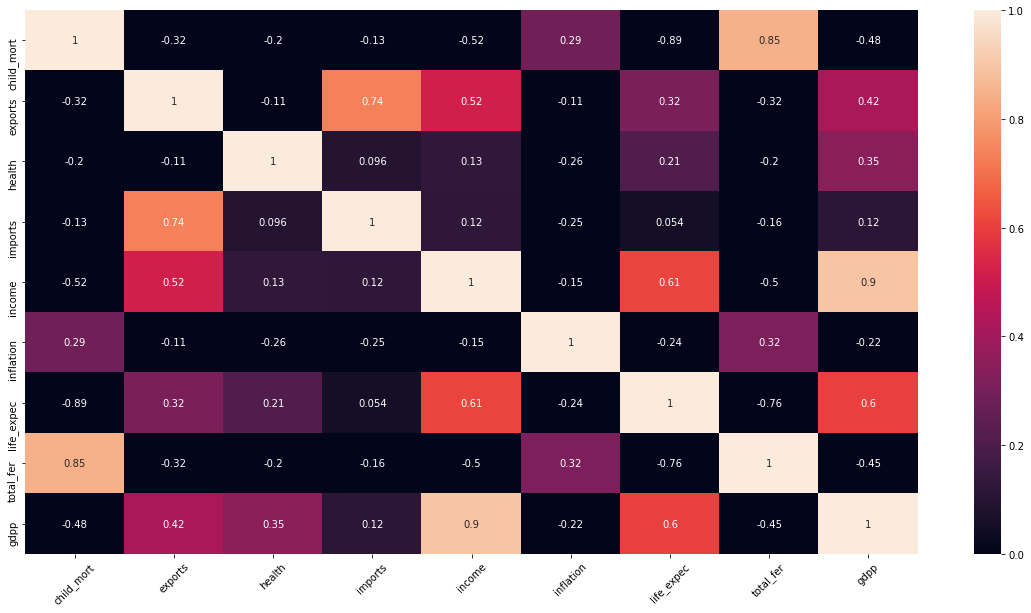

In [8]:
corr = data.corr()

plt.figure(figsize=(20, 10))
ax = sns.heatmap(corr, annot= True, vmin=0, vmax=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.show()

- Kematian anak sangat berkorelasi dengan fertilitas total dengan koefisien korelasi 0,85
- Impor & ekspor, kesehatan & gdpp, pendapatan & gdpp juga berkorelasi baik
- Harapan hidup memiliki korelasi negatif yang kuat dengan fertilitas total sekitar -0,76
- Kematian anak juga berkorelasi negatif kuat dengan harapan hidup

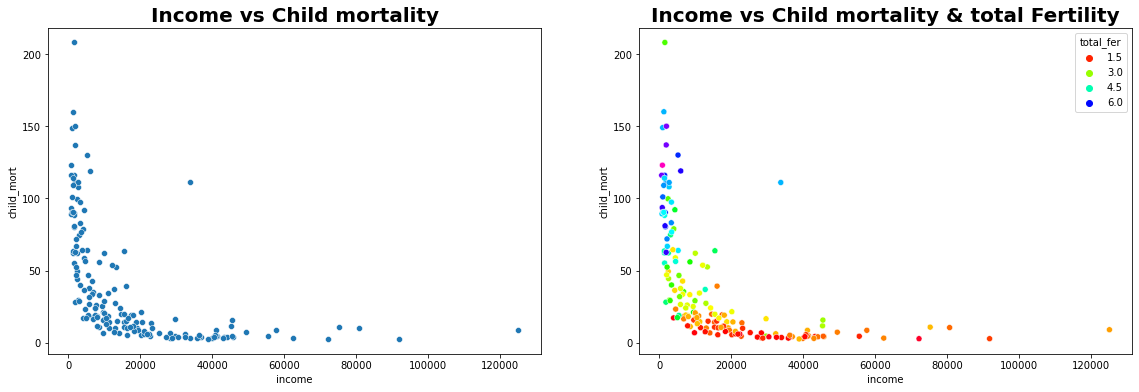

In [10]:
# Income vs Child Mortality

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=data)
plt.title('Income vs Child mortality',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='income',y='child_mort',hue='total_fer', data=data, palette='gist_rainbow')
plt.title('Income vs Child mortality & total Fertility',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

- Dari plot di atas Kita dapat melihat bahwa orang berpenghasilan rendah memiliki kematian anak yang tinggi, yang berarti kematian anak di bawah usia 5 tahun lebih banyak, di mana ada yang berpenghasilan rendah
- Dimana pendapatan lebih kita bisa melihat tidak ada kematian
- Pada plot kedua kita dapat melihat bahwa, tingkat kesuburan yang tinggi untuk seorang wanita dan pendapatan yang rendah memiliki kematian anak yang tinggi

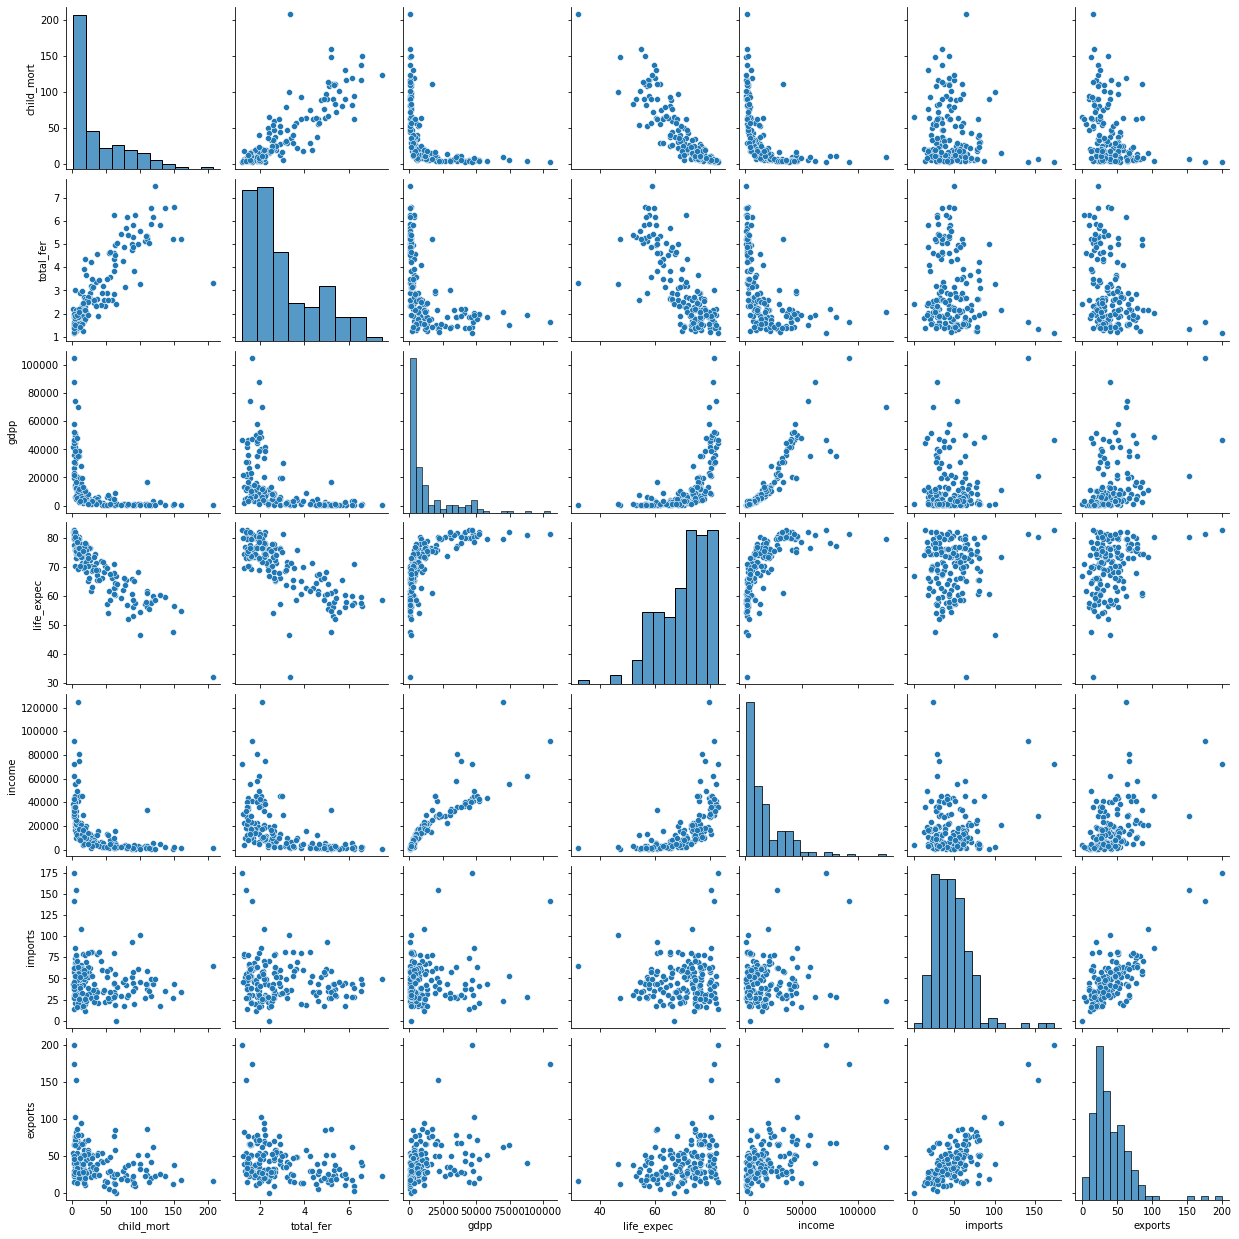

In [11]:
sns.pairplot(data, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

Dari pairplot di atas kita dapat melihat bagaimana variabel yang berbeda berkorelasi satu sama lain

In [13]:
# Country vs Child Mortality

Country= data.groupby('country').child_mort.sum().sort_values(ascending=False)
Country=pd.DataFrame(Country)
Country1=Country.head()
Country2=Country.tail()
display(Country1.head())  
print('*'*50)
display(Country2.tail())

,child_mort
country,
Haiti,208.0
Sierra Leone,160.0
Chad,150.0
Central African Republic,149.0
Mali,137.0


**************************************************


,child_mort
country,
Sweden,3.0
Finland,3.0
Singapore,2.8
Luxembourg,2.8
Iceland,2.6


Bisa dilihat pada tabel negara bagian africa yang lebih banyak kematian anak kecil dan iceland yang terendah

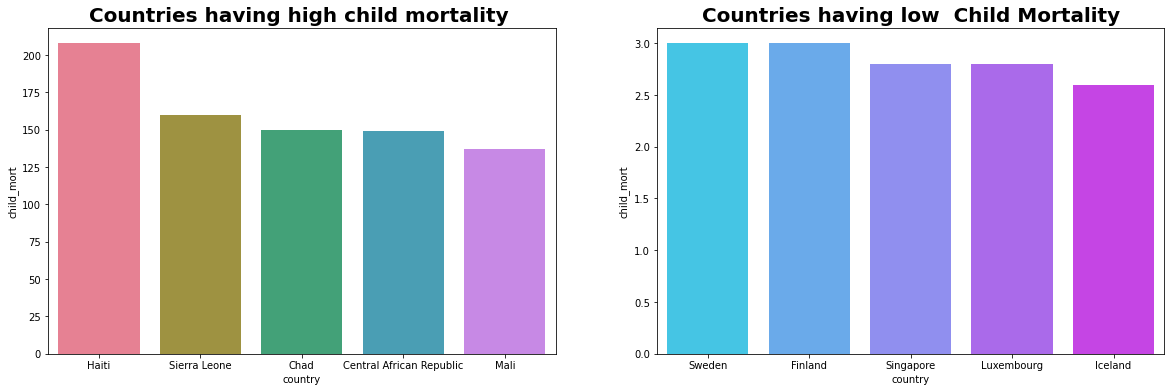

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Country1.index, Country1.child_mort, palette='husl')
plt.title('Countries having high child mortality ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Country2.index, Country2.child_mort, palette='cool')
plt.title('Countries having low  Child Mortality',fontweight="bold", size=20)
plt.show()

- Haiti adalah negara dengan kematian anak tertinggi sekitar 208 dari 1000 kelahiran hidup. Berikutnya adalah Sierra Leone
- Islandia dan Luksemburg adalah negara dengan angka kematian anak yang lebih sedikit

In [15]:
# Country vs Income

Income= data.groupby('country').income.sum().sort_values(ascending=False)
Income=pd.DataFrame(Income)
Income1=Income.head()
Income2=Income.tail()
display(Income1)
print('*'* 50)
display(Income2)

,income
country,
Qatar,125000
Luxembourg,91700
Brunei,80600
Kuwait,75200
Singapore,72100


**************************************************


,income
country,
Central African Republic,888
Niger,814
Burundi,764
Liberia,700
"Congo, Dem. Rep.",609


Qatar menjadi negara nomor 1 yang memiliki income terbesar, dan yang terkecil kebanyakan dari negara bagian afrika.

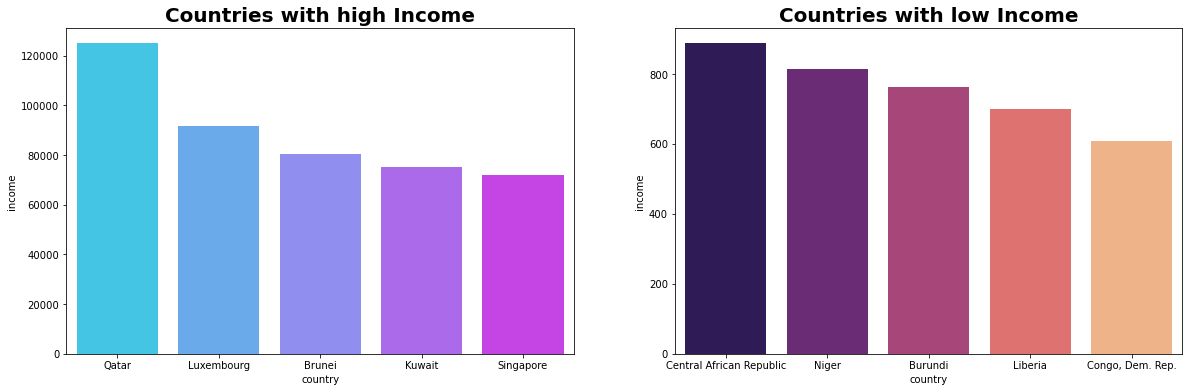

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(Income1.index, Income1.income, palette='cool')
plt.title('Countries with high Income',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(Income2.index, Income2.income, palette='magma')
plt.title('Countries with low Income',fontweight="bold", size=20)
plt.show()

- Penghasilan bersih per orang lebih banyak di Qatar yaitu 125000
- Kongo, Republik Demokratik, dan Liberia memiliki pendapatan yang lebih sedikit

In [18]:
# Country vs GDP

GDP= data.groupby('country').gdpp.sum().sort_values(ascending=False)
GDP=pd.DataFrame(GDP)
GDP1=GDP.head()
GDP2=GDP.tail()
display(GDP1)
print('*'* 50)
display(GDP2)

,gdpp
country,
Luxembourg,105000
Norway,87800
Switzerland,74600
Qatar,70300
Denmark,58000


**************************************************


,gdpp
country,
Sierra Leone,399
Niger,348
"Congo, Dem. Rep.",334
Liberia,327
Burundi,231


Pendapatan kotor masyarakat terbesar dipegang oleg negara Luxemburg dan lagi lagi yang tekecil GDP dipegang oleh negara bagian Afrika.

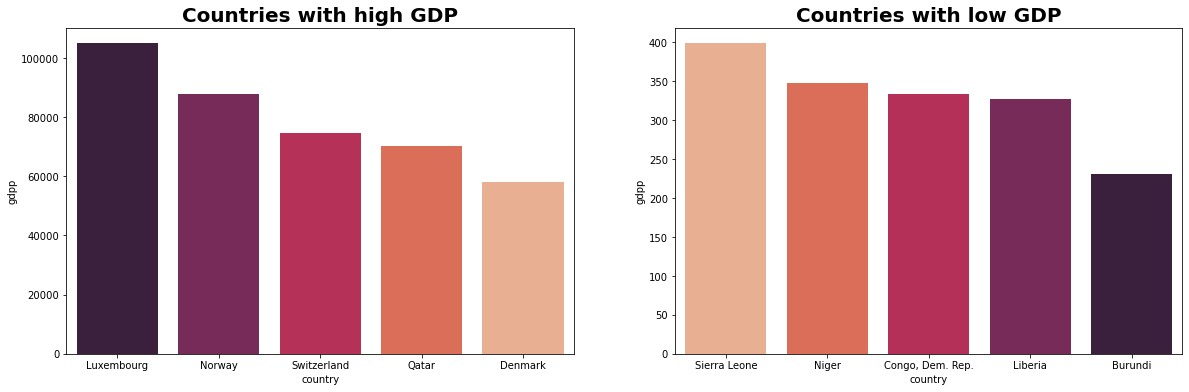

In [19]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(GDP1.index, GDP1.gdpp, palette='rocket')
plt.title('Countries with high GDP',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(GDP2.index, GDP2.gdpp, palette='rocket_r')
plt.title('Countries with low GDP',fontweight="bold", size=20)
plt.show()

- Kita dapat melihat bahwa Luksemburg memiliki PDB per kapita yang tinggi yaitu sekitar 105000. Kemudian berikutnya adalah Norwegia
- Burundi memiliki PDB per kapita yang sangat sedikit

In [20]:
# Life Expectancy

Life_Ex= data.sort_values(by=['life_expec'],ascending=True)
Life_Ex.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459


In [21]:
Life_ex=data.sort_values(by=['life_expec'],ascending=False)
display(Life_ex[0:5])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900


- Kita dapat melihat bahwa harapan hidup lebih rendah di Haiti, yang berarti anak yang baru lahir akan bertahan hidup selama beberapa tahun
- Kita sudah melihat di atas bahwa kematian anak juga lebih banyak di Haiti
- Jepang memiliki harapan hidup tertinggi

In [23]:
# Health

Health=data.sort_values(by=['health'], ascending= True)
Health[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440


In [24]:
Health1=data.sort_values(by=['health'], ascending= False)
Health1[0:5]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
159,United States,7.3,12.4,17.9,15.8,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.5,14.2,81.0,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.8,13.1,34.5,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.0,11.9,63.6,45500,0.848,80.7,1.79,50300
54,France,4.2,26.8,11.9,28.1,36900,1.050,81.4,2.03,40600


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Brunei'),
  Text(1, 0, 'Oman'),
  Text(2, 0, 'Eritrea'),
  Text(3, 0, 'Kuwait'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'Turkmenistan'),
  Text(6, 0, 'Congo, Rep.'),
  Text(7, 0, 'Pakistan'),
  Text(8, 0, 'Myanmar'),
  Text(9, 0, 'Qatar')])

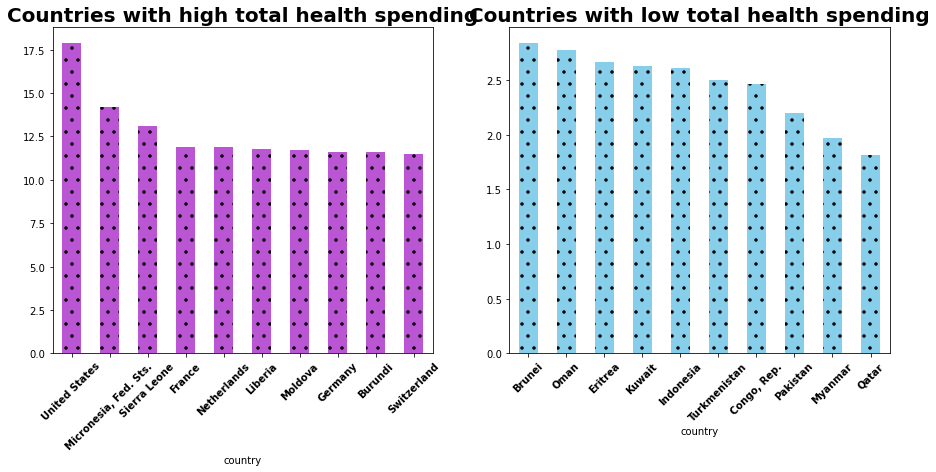

In [26]:
plt.figure(figsize=(15, 6))
He=data.groupby('country').health.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
He1=He.head(10).plot.bar(color='mediumorchid',hatch=".")
plt.title('Countries with high total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
He2=He.tail(10).plot.bar(color= 'skyblue',hatch='.')
plt.title('Countries with low total health spending',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")

- Amerika Serikat membelanjakan lebih banyak per orang untuk kesehatan daripada negara-negara yang sebanding yaitu 8663.
- Eritrea menghabiskan lebih sedikit untuk kesehatan

In [27]:
# Total Fertility

Fertility=data.sort_values(by=['total_fer'], ascending= True).head()
Fertility

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
138,South Korea,4.1,49.4,6.93,46.2,30400,3.160,80.1,1.23,22100
67,Hungary,6.0,81.8,7.33,76.5,22300,2.330,74.5,1.25,13100
102,Moldova,17.2,39.2,11.70,78.5,3910,11.100,69.7,1.27,1630
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610


In [28]:
Fertility1=data.sort_values(by=['total_fer'], ascending=False).head()
Fertility1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
32,Chad,150.0,36.80,4.53,43.5,1930,6.39,56.5,6.59,897
97,Mali,137.0,22.80,4.98,35.1,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


In [31]:
data.total_fer.max()

7.49

In [30]:
data.life_expec.max()

82.8

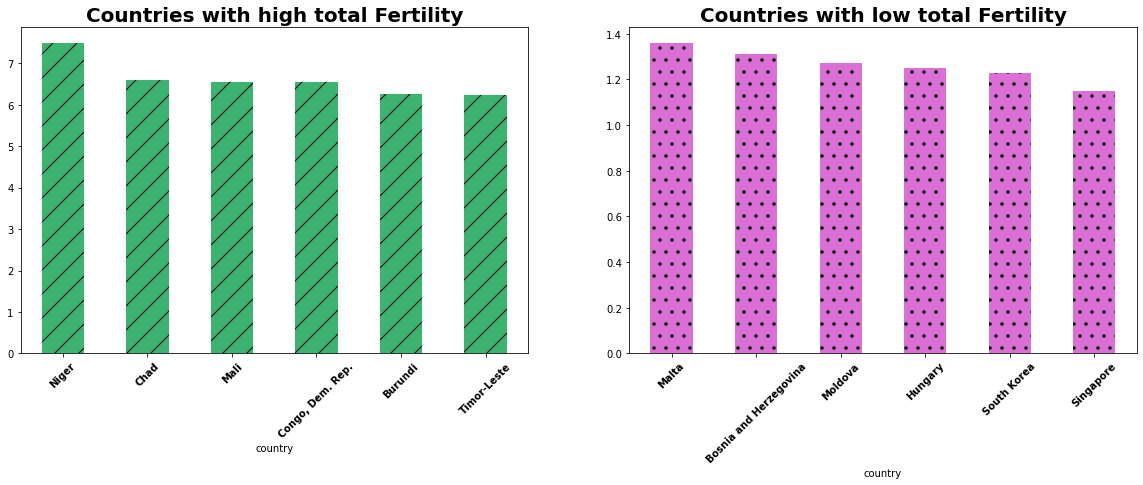

In [32]:
plt.figure(figsize=(20, 6))
Fe=data.groupby('country').total_fer.sum().sort_values(ascending= False)
plt.subplot(1,2,1)
Fe1=Fe.head(6).plot.bar(color='mediumseagreen',hatch="/")
plt.title('Countries with high total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.subplot(1,2,2)
Fe2=Fe.tail(6).plot.bar(color= 'orchid',hatch='.')
plt.title('Countries with low total Fertility',fontweight="bold", size=20)
plt.xticks(rotation = 45,fontweight="bold")
plt.show()

- Lebih sedikit jumlah anak yang lahir dari setiap wanita, dapat bertahan lebih lama, Seperti yang kita lihat di Singapura, Korea Selatan memiliki harapan hidup yang lebih tinggi dan fertilitas total yang lebih sedikit.
- Chad, Mali dan Republik Dem Kongo memiliki kesuburan dan moralitas anak yang sangat tinggi

In [35]:
# Inflation

In=data.sort_values(by=['inflation'], ascending=False).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100


In [34]:
In=data.sort_values(by=['inflation'], ascending=True).head()
In

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
131,Seychelles,14.4,93.8,3.40,108.0,20400,-4.210,73.4,2.17,10800
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


Nigeria memiliki tingkat inflasi yang tinggi sedangkan Jepang, Irlandia memiliki tingkat inflasi yang sangat rendah

# 5. DATA PREPROCESSING

## Get Data for Model Inference

In [36]:
# Get Data for Model Inference

data_inf = data_copy.sample(10, random_state=6)
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
71,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
143,Suriname,24.1,52.5,7.01,38.4,14200,7.20,70.3,2.52,8300
72,Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17100
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
116,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1040


In [37]:
# Remove Inference-Set from Dataset

data_train_test = data_copy.drop(data_inf.index)
data_train_test

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [38]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220
1,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
2,Iran,19.3,24.4,5.60,19.4,17400,15.90,74.5,1.76,6530
3,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
4,Suriname,24.1,52.5,7.01,38.4,14200,7.20,70.3,2.52,8300
5,Iraq,36.9,39.4,8.41,34.1,12700,16.60,67.2,4.56,4500
6,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.90,60.9,5.21,17100
7,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
8,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
9,Pakistan,92.1,13.5,2.20,19.4,4280,10.90,65.3,3.85,1040


## Handling Missing Value

In [39]:
# Check Missing Values

data_copy.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [40]:
# Check Missing Values as Percentage to Total Data

data_copy.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

Tidak terdapat missing values pada dataset kali ini.

## Split between Numerical Columns and Categorical Columns

Pertama-tama mencari tau kolom mana yang berjenis numerikal dan kategorik.


In [41]:
# Paramater Categorization

numerical_col = data_copy.select_dtypes(include=np.number).columns.tolist()
categorical_col = data_copy.select_dtypes(include=['object']).columns.tolist()

In [42]:
# Show each categories

print('Numerical Parameters')
print(numerical_col)
print()
print('Categorical Parameters')
print(categorical_col)

Numerical Parameters
['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Categorical Parameters
['country']


In [43]:
# Memisahkan jenis Numerik dan Kateogrik di dalam dataframe

data_num = data_copy[numerical_col]
data_cat = data_copy[categorical_col]

## Handling Outliers

### Identify variable distribution

Pada sub bab kali ini akan handling outliers hanya untuk kolom berjenis numerikal.

Selanjutnya menjadi tahu distribusi dari masing-masing kolom numerik, karena penting untuk membagi jenis skewednya yang mana keterangannya sebagai berikut:
- Jika skewness di antara -0.5 dan 0.5, data termasuk *fairly symmetrical*.
- Jika skewness di antara -1 dan -0.5 atau di antara 0.5 dan 1, data termasuk *moderately skewed*.
- Jika skewness di bawah dari -1 atau di atas dari 1, maka data termasuk *highly skewed*.

In [44]:
# Input Paramater Distribution  Check
dist_check = data_copy.skew(numeric_only=True)

normal_dist = []
skew_dist = []

for i in range(len(dist_check)):
    if dist_check.values[i] < -0.5:
        skew_dist.append(dist_check.index[i])
    elif dist_check.values[i] > 0.5:
        skew_dist.append(dist_check.index[i])
    else:
        normal_dist.append(dist_check.index[i])

In [45]:
# Skew dist
print('skew_dist :', skew_dist)
print("__________"*20)
# normal_dist
print('normal_dist :',normal_dist)
print("__________"*20)

skew_dist : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
________________________________________________________________________________________________________________________________________________________________________________________________________
normal_dist : []
________________________________________________________________________________________________________________________________________________________________________________________________________


Kolom berjenis numerik semuanya berdistribusi skewed

In [46]:
# Fungsi untuk membuat histogram dan boxplot
# Fungsi ini diambil dari dataframe (data) dan variable yang akan diambil nantinya.
# Hanya kolom numerik yang akan dihandling outliernya kali ini

def diagnostic_plots(data_copy, variable):
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data_copy[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=data_copy[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi child_mort


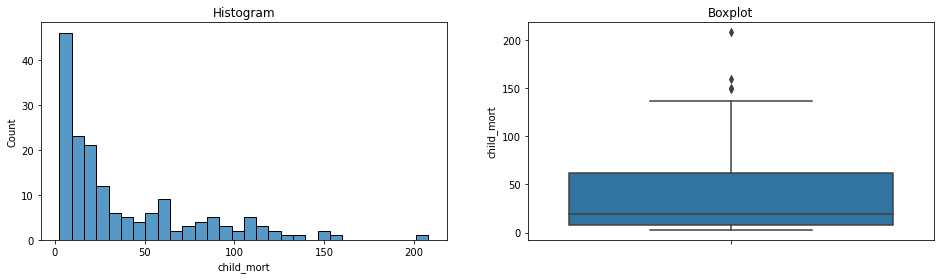

Skewness Value :  1.4507735387555047

Distribusi exports


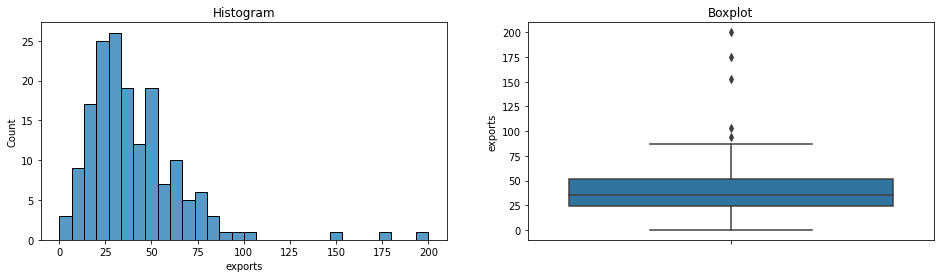

Skewness Value :  2.4458240051613496

Distribusi health


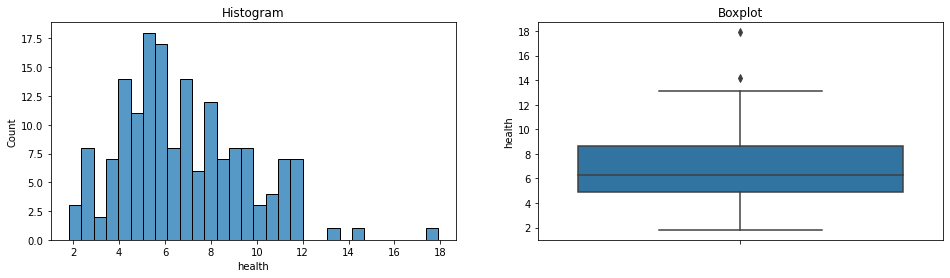

Skewness Value :  0.7057460547100981

Distribusi imports


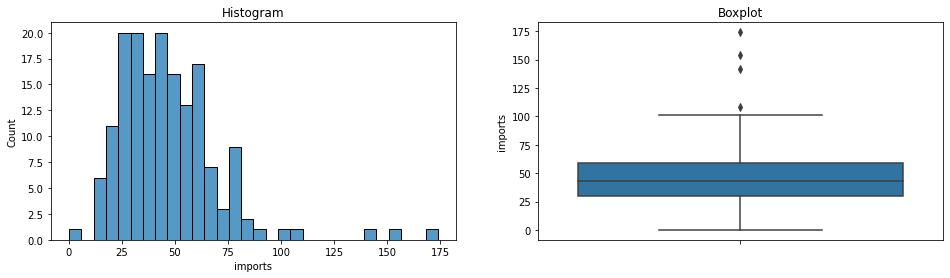

Skewness Value :  1.90527571988626

Distribusi income


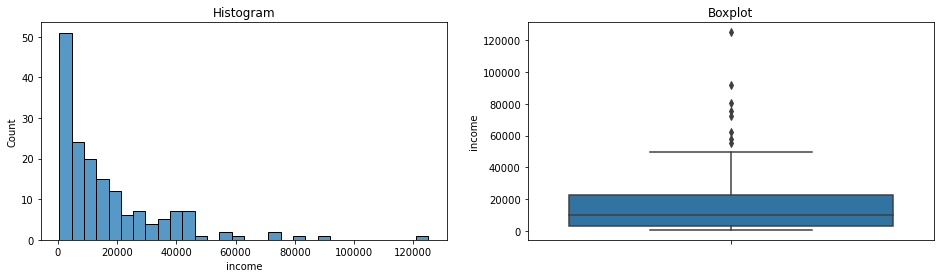

Skewness Value :  2.231479607767527

Distribusi inflation


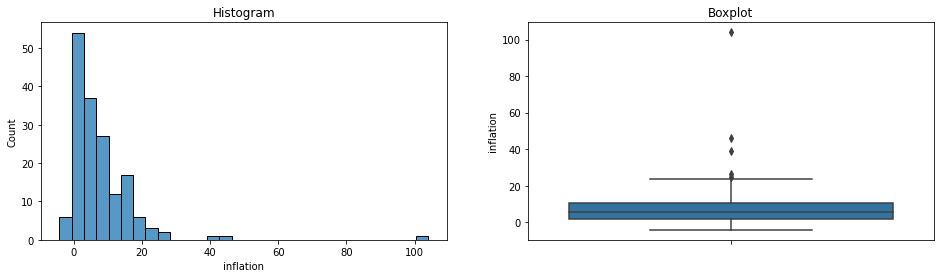

Skewness Value :  5.154049359697972

Distribusi life_expec


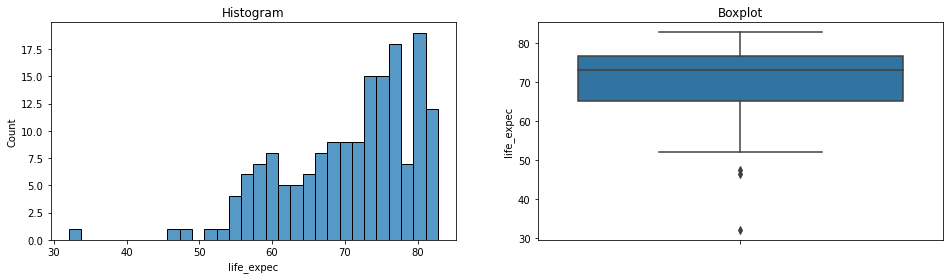

Skewness Value :  -0.9709955819991258

Distribusi total_fer


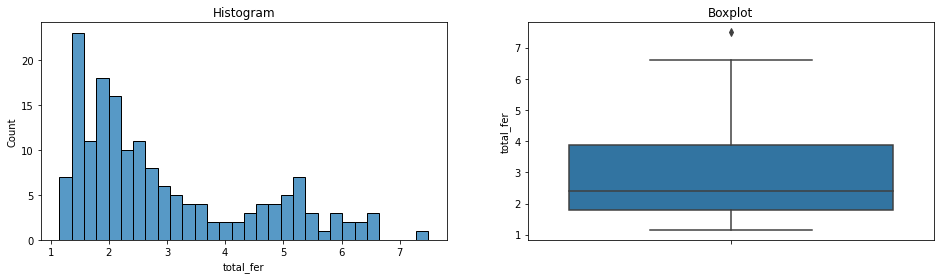

Skewness Value :  0.9670916808050207

Distribusi gdpp


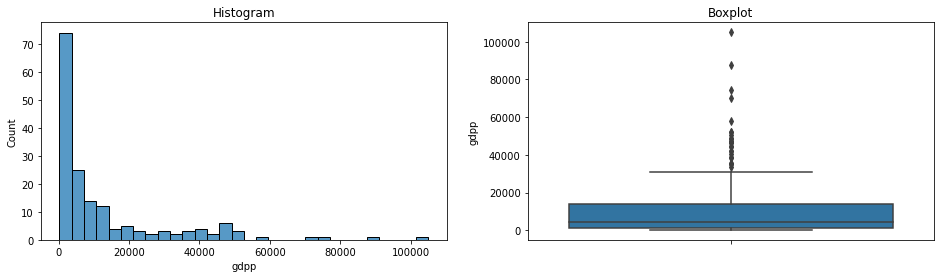

Skewness Value :  2.2180514519497163



In [47]:
# Menunjukkan distribusi dengan graik histogram Kolom numerik 

for columns in data_num.columns:
    print(f'Distribusi {columns}')
    diagnostic_plots(data_copy, columns)
    print('Skewness Value : ', data_copy[columns].skew())
    print('')


### Handling Outliers with Capping

In [64]:
#Capping
q2 = data_copy['imports'].quantile(0.99)
q3 = data_copy['health'].quantile(0.99)
q4 = data_copy['income'].quantile(0.99)
q5 = data_copy['inflation'].quantile(0.99)
q6 = data_copy['life_expec'].quantile(0.99)
q7 = data_copy['total_fer'].quantile(0.99)
q8 = data_copy['gdpp'].quantile(0.99)

data_copy['imports'][data_copy['imports']>= q2] = q2
data_copy['health'][data_copy['health']>= q3] = q3
data_copy['income'][data_copy['income']>= q4] = q4
data_copy['inflation'][data_copy['inflation']>= q5] = q5
data_copy['life_expec'][data_copy['life_expec']>= q6] = q6
data_copy['total_fer'][data_copy['total_fer']>= q7] = q7
data_copy['gdpp'][data_copy['gdpp']>= q8] = q8

Berdasarkan hasil bahwa persentase dari kolom dataset ini kebanyakan <5% maka dilakukan capping.

## Feature Scaling

In [65]:
# Display Columns Numerical

data_num

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
scaler = StandardScaler()
df1 = scaler.fit_transform(data_copy.drop('country', axis = 1))
df1

array([[ 1.29153238, -1.13827979,  0.30123858, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47965843, -0.08896601, ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.09912164, -0.99060381, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541,  1.13030491,  0.02089742, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.40647827, -0.60797601, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.15034774, -0.33900002, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

Unsupervised Learning tidak ada label yang mana harus mengubah kolom object menjadi numerikal, pada dataset ini berfokus pada kolom numerikal saja sehingga kolom country didrop

In [67]:
df1 = pd.DataFrame(df1, columns = data_copy.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.301239,-0.076771,-0.851668,0.265002,-1.619705,1.926396,-0.702259
1,-0.538949,-0.479658,-0.088966,0.083204,-0.386946,-0.372075,0.648831,-0.865054,-0.498726
2,-0.272833,-0.099122,-0.990604,-0.660465,-0.221053,1.122161,0.671403,-0.034983,-0.477434
3,2.007808,0.775381,-1.490672,-0.163244,-0.612045,1.932987,-1.179541,2.153997,-0.530950
4,-0.695634,0.160668,-0.285963,0.528541,0.125254,-0.764618,0.705262,-0.543736,-0.032042


## Clustering

Statistik Hopkins, adalah statistik yang memberikan nilai yang menunjukkan kecenderungan cluster, dengan kata lain: seberapa baik data dapat dikelompokkan.

In [68]:
# Check the hopkins

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [69]:
data_copy.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [71]:
hopkins(data_copy.drop('country', axis = 1))

0.9296439027332901

Kita dapat melihat bahwa nilainya berada di antara {0.8, ..., 0.99}, sehingga dataset memiliki kecenderungan yang tinggi untuk mengelompok.

## Variance Inflation Factor

In [74]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_num.values, i) for i in range(len(data_num.columns))]

vif_data

,feature,VIF
0,child_mort,8.084814
1,exports,16.084236
2,health,12.421525
3,imports,17.280234
4,income,13.414051
5,inflation,1.985961
6,life_expec,21.916807
7,total_fer,17.673828
8,gdpp,10.298641


Terbukti jika pengelompokkan pada dataset ini tinggi jika dilihat dari nilai VIF <5 hanya kolom inflation dan sisanya lebih dari itu.

## Reduksi Dimensi Menggunakan PCA

Setelah scaling

In [81]:
pca_scaled=PCA(n_components=9).fit(df1)
pca_scaled.explained_variance_ratio_

array([0.46785408, 0.1701858 , 0.13487614, 0.10643122, 0.06858971,
       0.02435509, 0.01267144, 0.00926959, 0.00576692])

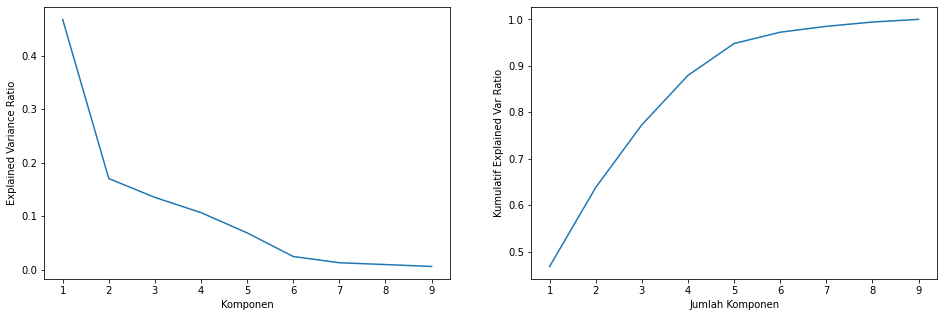

In [82]:

fig,ax=plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,10),pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel('Komponen')
ax[0].set_ylabel('Explained Variance Ratio')

ax[1].plot(range(1,10),np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel('Jumlah Komponen')
ax[1].set_ylabel('Kumulatif Explained Var Ratio')
plt.show()



- Nampak bahwa adanya degradasi nilai EVR yang gradual dari komponen pertama hingga terakhir
- Nampak ada patahan di komponen 6, dengan cumsum EVR 0.95, kemungkinan 6 komponen merupakan jumlah yang terbaik dengan cumsum EVR sekitar 95%. 

In [84]:
# Mereduksi menjadi 95%
pca=PCA(n_components=0.95, random_state = 6)
pca.fit(df1)
pca.n_components_

6

In [86]:
# Mengurangi dimensi setelah scaling menjadi 6 dimensi
x_pca  = pca.transform(df1)
x_pca.shape

(167, 6)

In [87]:
# kita lihat seberapa mewakili data nyata
print("variance ratio: ", pca.explained_variance_ratio_)
#kami mencari tahu berapa banyak data saya yang hilang
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.46785408 0.1701858  0.13487614 0.10643122 0.06858971 0.02435509]
sum:  0.9722920408225368


# 6. MODEL DEFINITION

## K-Mean Clustering

- To Choose the value of k, there are two methods, 1. Silhouette score 2. Elbow curve-ssd
- Silhouette score

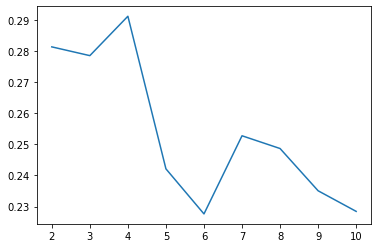

In [89]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(x_pca)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

plt.show()

Dari plot skor siluet di atas, Kita dapat melihat bahwa kita memiliki maksimum pada 3, dan maksimum berikutnya adalah pada 4. Jadi kita dapat 4.

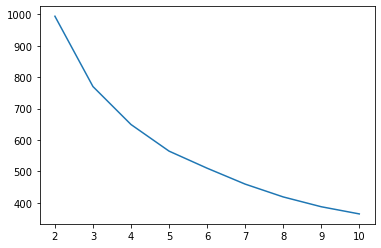

In [90]:
# Elbow curve

ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(x_pca)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])
plt.show()

- Dari kurva siku di atas kita dapat melihat bahwa kita memiliki breakpoint di 3 dan satu breakpoint di 4.

- Dari kedua plot di atas, Kita dapat memilih nilai k yang lebih rendah, yaitu 3 di sini. Jadi k=3

In [91]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(x_pca)

KMeans(n_clusters=3, random_state=50)

In [92]:
KMeans(n_clusters=3, random_state=50)

KMeans(n_clusters=3, random_state=50)

In [95]:
df_kmean = data_copy.copy()

In [96]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,1
1,2
2,2
3,1
4,2


In [97]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [98]:
df_kmean.label.value_counts()

2    84
1    47
0    36
Name: label, dtype: int64

Cluster 1 memiliki jumlah titik data yang tinggi dibandingkan dengan dua cluster lainnya

# 7. MODEL EVALUATION

## Plotting the clusters

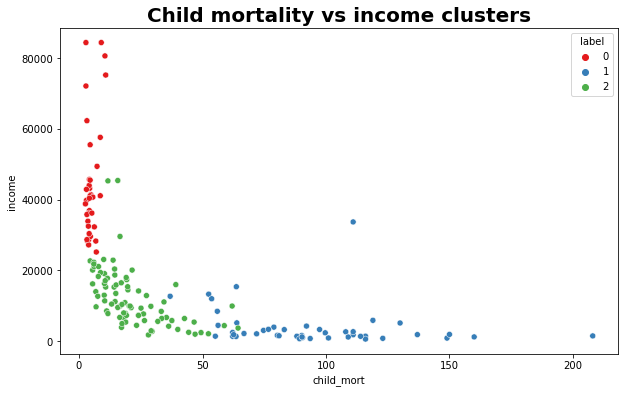

In [99]:
# Child Mortality vs Income
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')
plt.title('Child mortality vs income clusters',fontweight="bold", size=20)

plt.show()

Dilihat pada grafik di atas sudah cukup jelas clusterisasi terhadap label 0, 1, dan 2.

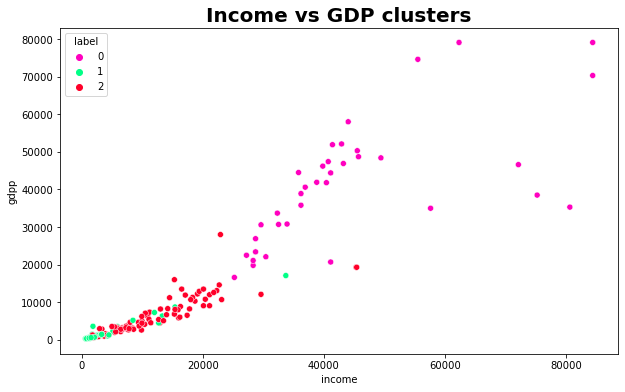

In [100]:
# Income vs GDP
# Plot the cluster
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'gist_rainbow_r')
plt.title('Income vs GDP clusters',fontweight="bold", size=20)
plt.show()

Dari grafik di atas masih belum menunjukkan clustering yang baik karena masih tumpang tindih dan terdapat banyak anomali outliers.

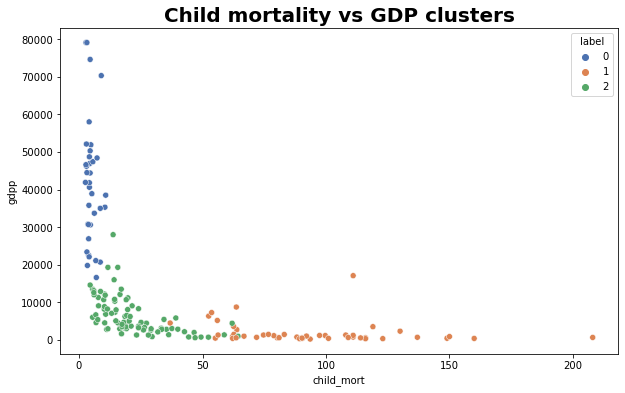

In [101]:
# Child Mortality vs GDP
# Plot the cluster|
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'deep')
plt.title('Child mortality vs GDP clusters',fontweight="bold", size=20 )
plt.show()

Dari Grafik di atas sudah cukup bagus untuk clusteringnya, hanya saja label 2 masih ada sebagian yang tumpang tindih pada label 1.

## Cluster Profiling

In [102]:
# Making sense out of the clsuters by finding the mean
df2=df_kmean.drop('country', axis = 1).groupby('label').mean()
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
label,,,,,,,,,
0,5.000000,58.738889,8.684833,50.496111,44340.222222,2.671250,80.106667,1.752778,41532.666667
1,92.961702,29.151277,6.388511,42.323404,3942.404255,10.689426,59.187234,4.987813,1922.382979
2,21.927381,40.243917,6.192310,47.473404,12305.595238,7.548262,72.814286,2.307500,6486.452381


Di atas kita dapat melihat pusat cluster untuk tiga cluster yang kita dapatkan

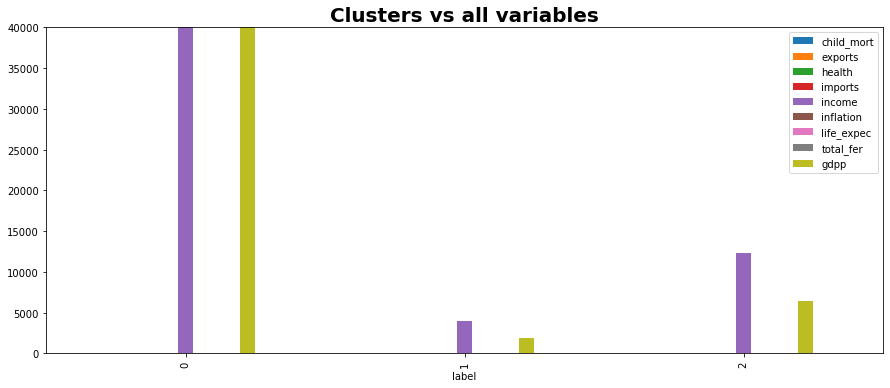

In [103]:
df_kmean.drop('country', axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,40000])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

Properti cluster tidak begitu jelas dengan semua kolom

In [104]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

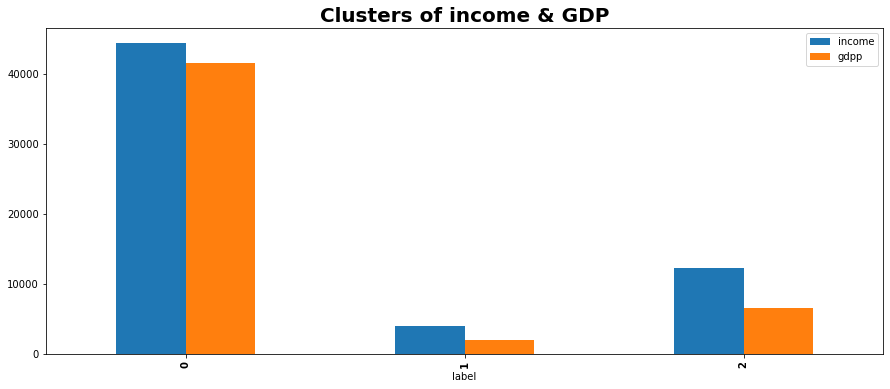

In [105]:
df_kmean.drop(['country', 'exports', 'health', 'imports','child_mort',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.title('Clusters of income & GDP',fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- Klaster 0 berpenghasilan tinggi dan PDB tinggi
- Klaster 1 berpenghasilan dan PDB sangat rendah

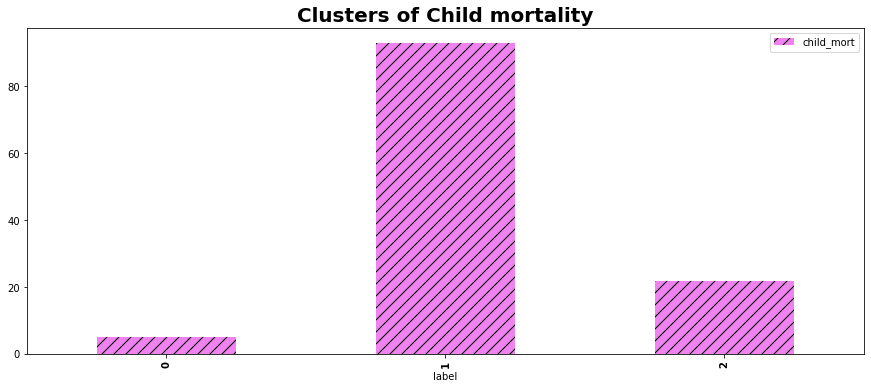

In [106]:
df_kmean.drop(['country', 'exports', 'health', 'imports','income', 'gdpp',
       'inflation', 'life_expec', 'total_fer'],axis = 1).groupby('label').mean().plot.bar(figsize=(15,6),color='violet',hatch="//")
plt.title('Clusters of Child mortality', fontweight="bold", size=20)
plt.xticks(fontweight='bold')
plt.show()

- Cluster 0 memiliki angka kematian anak yang rendah
- Klaster 1 memiliki angka kematian anak yang tinggi

**Dari clustering profiling pada K-means clustering kita dapat melihat bahwa :**
1. Klaster 0 berpenghasilan tinggi, PDB tinggi dan kematian anak sangat rendah
2. Klaster 2 berpenghasilan  rendah, PDB rendah dan kematian anak lebih sedikit
3. Klaster 1 berpenghasilan rendah, PDB, tetapi kematian anak sangat tinggi

- Saya melihat dalam profil klaster bahwa klaster 1 berpenghasilan rendah, PDB rendah, dan Kematian Anak Tinggi
- Jadi kita dapat mengatakan bahwa negara-negara di bawah cluster 1 membutuhkan bantuan. Mari kita lihat negara-negaranya

In [110]:
Kmean=df_kmean[df_kmean['label'] == 1]
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,43.6,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1


In [111]:
# Countries we should focus more on:

K=Kmean[['country']]
K= K.reset_index(drop=True)
K

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso
5,Burundi
6,Cameroon
7,Central African Republic
8,Chad
9,Comoros


In [112]:
#Sorting based on high child mortality,low income and GDP
final=df_kmean[df_kmean['label'] == 1].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.450,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.200,55.0,5.2000,399.0,1
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.390,56.5,6.5636,897.0,1
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.010,47.5,5.2100,446.0,1
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.370,59.5,6.5500,708.0,1
113,Nigeria,130.0,25.3,5.07,17.4,5150.0,41.478,60.5,5.8400,2330.0,1
112,Niger,123.0,22.2,5.16,49.1,814.0,2.550,58.8,6.5636,348.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.1600,3530.0,1
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609.0,20.800,57.5,6.5400,334.0,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.8700,575.0,1


In [113]:
print("Top 10 countries which are in direst need of aid" )
f=final[['country']].head(10)
df_r = f.reset_index(drop=True)
df_r

Top 10 countries which are in direst need of aid


,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
5,Nigeria
6,Niger
7,Angola
8,"Congo, Dem. Rep."
9,Burkina Faso


Jadi dari K berarti clustering, di atas adalah 10 negara yang sangat membutuhkan bantuan yang kebanyakan dari benua Afrika, sesua pada EDA pertama di atas

# 8. KESIMPULAN

Dari K berarti pengelompokan 3 cluster yang kami dapatkan dengan kematian anak tinggi, pendapatan rendah dan PDB rendah
Daftar akhir negara yang kami dapatkan adalah:

In [116]:
Kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,43.6,8.30,51.3,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,19.2,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,1


In [117]:
Kmean=Kmean.sort_values(by=['child_mort','income','gdpp'], ascending=[False,True,True])
Kmean.head()   

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,15.3,6.91,64.7,1500.0,5.45,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,16.8,13.10,34.5,1220.0,17.20,55.0,5.2000,399.0,1
32,Chad,150.0,36.8,4.53,43.5,1930.0,6.39,56.5,6.5636,897.0,1
31,Central African Republic,149.0,11.8,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,1
97,Mali,137.0,22.8,4.98,35.1,1870.0,4.37,59.5,6.5500,708.0,1


In [118]:
print('10 Countries based on high child mortality, low income and low GDP')
Kmean[['country']].head(10)

10 Countries based on high child mortality, low income and low GDP


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali
113,Nigeria
112,Niger
3,Angola
37,"Congo, Dem. Rep."
25,Burkina Faso


Mari kita pilih negara berdasarkan faktor sosial ekonomi dan kesehatan

In [119]:
Kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,92.961702,29.151277,6.388511,42.323404,3942.404255,10.689426,59.187234,4.987813,1922.382979,1.0
std,33.375229,18.160597,2.662015,17.732741,5641.790360,8.584551,6.443521,1.000473,2956.103925,0.0
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.800000,16.950000,4.520000,29.800000,1390.000000,4.010000,56.650000,4.535000,550.000000,1.0
50%,90.200000,23.800000,5.660000,40.300000,1870.000000,8.920000,59.500000,5.060000,897.000000,1.0
75%,111.000000,38.200000,8.105000,49.450000,3675.000000,16.600000,62.850000,5.635000,1470.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,41.478000,71.100000,6.563600,17100.000000,1.0


Untuk cluster terpilih Nilai rata-rata kematian anak adalah 93. Mari kita pilih negara lebih dari nilai rata-rata ini karena kita melihat angka kematian anak yang tinggi

In [120]:
df_final_list = Kmean[Kmean['child_mort']>93]
df_final_list.shape

(20, 11)

In [121]:
# Let's check the demographic of the resultant data again

df_final_list.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,123.185000,31.586000,6.299500,44.265000,3607.150000,11.230150,56.110000,5.463360,1741.600000,1.0
std,26.987254,19.145232,2.786234,17.896024,7220.965523,10.464239,7.310044,0.923929,3698.064265,0.0
min,93.600000,8.920000,2.850000,17.400000,609.000000,0.885000,32.100000,3.300000,231.000000,1.0
25%,108.750000,18.600000,4.517500,34.950000,1122.000000,3.855000,55.450000,5.177500,439.250000,1.0
50%,115.000000,24.550000,5.145000,43.050000,1660.000000,6.600000,57.600000,5.350000,685.000000,1.0
75%,131.750000,39.825000,7.160000,49.225000,2667.500000,17.625000,59.650000,6.185000,1205.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,41.478000,68.200000,6.563600,17100.000000,1.0


Sekarang Nilai rata-rata income adalah 3607. Mari kita pilih negara yang kurang dari nilai rata-rata ini.

In [122]:
df_final_list1 = df_final_list[df_final_list['income']<3607.150000]
df_final_list1.shape

(17, 11)

In [123]:
# Let's check the demographic of the resultant data again

df_final_list1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
count,17.000000,17.00000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,123.747059,26.96000,6.681765,45.064706,1611.352941,7.989706,55.335294,5.415129,698.352941,1.0
std,29.176320,12.93841,2.831667,17.917238,781.538942,6.497282,7.693174,0.983881,345.567638,0.0
min,93.600000,8.92000,3.980000,26.500000,609.000000,0.885000,32.100000,3.300000,231.000000,1.0
25%,108.000000,16.80000,4.930000,35.100000,918.000000,2.970000,55.000000,5.110000,419.000000,1.0
50%,114.000000,22.80000,5.210000,43.200000,1430.000000,5.450000,57.300000,5.340000,648.000000,1.0
75%,137.000000,36.80000,7.910000,49.100000,1930.000000,12.300000,58.000000,6.260000,897.000000,1.0
max,208.000000,50.70000,13.100000,101.000000,3320.000000,20.800000,68.200000,6.563600,1310.000000,1.0


Sekarang Nilai rata-rata GDP adalah 698. Mari kita pilih negara-negara yang kurang dari nilai rata-rata ini.

In [125]:
df_final_list2 = df_final_list1[df_final_list1['gdpp']<698]
df_final_list2.shape

(10, 11)

In [126]:
df_final_list2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
66,Haiti,208.0,15.30,6.91,64.7,1500.0,5.45,32.1,3.3300,662.0,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220.0,17.20,55.0,5.2000,399.0,1
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,1
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,6.5636,348.0,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.5400,334.0,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.0,6.81,57.9,5.8700,575.0,1
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390.0,2.97,55.6,5.0500,547.0,1
63,Guinea,109.0,30.30,4.93,43.2,1190.0,16.10,58.0,5.3400,648.0,1
106,Mozambique,101.0,31.50,5.21,46.2,918.0,7.64,54.5,5.5600,419.0,1
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.2600,231.0,1


**Daftar akhir negara-negara yang membutuhkan bantuan berdasarkan faktor sosial ekonomi.**

In [127]:
A_countries=df_final_list2['country']
A_countries=A_countries.reset_index(drop=True)
A_countries

0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object


- Dari EDA yang dilakukan kita dapat melihat bahwa Pendapatan, PDB dan Kematian anak adalah tiga variabel utama yang perlu difokuskan
- Dalam K berarti clustering yang kita dapatkan Cluster 1 berpenghasilan sangat rendah, PDB sangat rendah tetapi kematian anak tinggi. Jadi kami menyimpulkan bahwa negara-negara di bawah cluster 1 membutuhkan bantuan.
- Cluster yang terbentuk dalam K mendaptatkan 5 negara teratas dengan kematian anak tinggi, PDB rendah, dan pendapatan rendah
- Kemudian kami mencari negara berdasarkan faktor sosial ekonomi

In [128]:
print('Top 5 Countries based on K means clustering:')
Kmean[['country']].head()

Top 5 Countries based on K means clustering:


,country
66,Haiti
132,Sierra Leone
32,Chad
31,Central African Republic
97,Mali


In [129]:
print('Countries based on socio economic and health factors:')
A_countries

Countries based on socio economic and health factors:


0                       Haiti
1                Sierra Leone
2    Central African Republic
3                       Niger
4            Congo, Dem. Rep.
5                Burkina Faso
6               Guinea-Bissau
7                      Guinea
8                  Mozambique
9                     Burundi
Name: country, dtype: object

- Dari analisis yang dilakukan, kita dapat melihat bahwa masyarakat berpenghasilan rendah memiliki angka kematian anak yang tinggi, sehingga CEO harus lebih fokus pada negara berpenghasilan rendah
- Kita juga bisa melihat PDB per kapita yang rendah negara-negara tidak banyak melakukan impor dan ekspor barang dan jasa. Negara-negara itu juga harus fokus
- Ada beberapa negara yang menghabiskan banyak uang untuk kesehatan bagi orang-orang yang tinggal di negara itu. Misalnya: AS. Negara-negara seperti itu bisa dilewati. Dan lebih fokus pada Burundi, Kongo, Dem. Rep di mana total pengeluaran kesehatan terlalu sedikit.
- Jika fertilitas total kurang maka harapan hidup lebih. Haiti adalah negara yang memiliki harapan hidup yang sangat rendah, dan kematian anak yang tinggi. Adalah baik untuk memiliki lebih sedikit anak per wanita, sehingga mereka dapat dirawat dengan baik.

## Problem Questions

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?

2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.

3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?

4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?

5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

## Jawaban

1. Dari EDA yang dilakukan kita dapat melihat bahwa Pendapatan, PDB dan Kematian anak adalah tiga variabel utama yang perlu difokuskan. Dari analisis yang dilakukan, kita dapat melihat bahwa masyarakat berpenghasilan rendah memiliki angka kematian anak yang tinggi, sehingga CEO harus lebih fokus pada negara berpenghasilan rendah. Kita juga bisa melihat PDB per kapita yang rendah negara-negara tidak banyak melakukan impor dan ekspor barang dan jasa. Negara-negara itu juga harus fokus.

2. Pada algoritma K-Means ini setelah di analysis hanya mendapatkan 3 clusetering. sudah ada beberapa yang optimal dan belum optimal karena masih ada timpang tindih satu sama lain dalam clusteringnya, sehingga perlu dicoba pada cluster algoritma lainnya.

3. Dari ketiga cluster yang berlabelkan 0, 1, dan 2. hanya label 1 yang membutuhkan bantuan dunia dalam K berarti clustering yang kita dapatkan Cluster 1 berpenghasilan sangat rendah, PDB sangat rendah tetapi kematian anak tinggi. Jadi kami menyimpulkan bahwa negara-negara di bawah cluster 1 membutuhkan bantuan. 

4. Ada beberapa negara yang menghabiskan banyak uang untuk kesehatan bagi orang-orang yang tinggal di negara itu. Misalnya: AS. Negara-negara seperti itu bisa dilewati. Dan lebih fokus pada Burundi, Kongo, Dem. Rep di mana total pengeluaran kesehatan terlalu sedikit.

5. Overall berhubungan dengan EDA yang pertama karena yang membutuhkan bantuan dunia kebanyakan dari benua Afrika, lalu setelah dilakukan clustering menjadi 3 label, negara-negara Afrika yang membutuhkan bantuan tersebut masuk dalam label 1 yang mana sangat membutuhkan bantuan dunia. Cuma bedanya sesudah diclustering kita bisa mengambil top country yang setidaknya ada data untuk membuktikan kalo negara tersebut sangat membutuhkan dunia dan perlu direkomendasi dari cara model algoritma unsupervised ini.